In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airports.csv to airports.csv
Saving flights_co2.csv to flights_co2.csv


In [ ]:
import pandas as pd
airports = pd.read_csv("airports.csv")
flights = pd.read_csv("flights_co2.csv")

In [ ]:
# 2) Column dtypes + conversion
flights_dtypes = flights.dtypes.reset_index()
flights_dtypes.columns = ['column', 'dtype']

In [ ]:
# convert date / time
f = flights.copy()
for col in ['departure_time', 'arrival_time', 'scan_date']:
    if col in f.columns:
        f[col] = pd.to_datetime(f[col], errors='coerce', infer_datetime_format=True)


/tmp/ipython-input-2388584090.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  f[col] = pd.to_datetime(f[col], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-2388584090.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  f[col] = pd.to_datetime(f[col], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-2388584090.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datet

In [ ]:
# Numeric conversions
# price
if 'price' in f.columns:
    f['price'] = pd.to_numeric(f['price'], errors='coerce')

# co2_emissions and avg_co2_emission_for_this_route
for col in ['co2_emissions', 'avg_co2_emission_for_this_route']:
    if col in f.columns:
        f[col] = pd.to_numeric(f[col], errors='coerce')

In [ ]:
airports_missing = airports.isnull().sum().reset_index()
airports_missing.columns = ['column', 'missing_count']
flights_missing = flights.isnull().sum().reset_index()
flights_missing.columns = ['column', 'missing_count']
print(flights_missing)

                             column  missing_count
0                 from_airport_code              0
1                      from_country              0
2                              IATA              0
3                      dest_country              0
4                     aircraft_type          13914
5                    airline_number              0
6                      airline_name              0
7                     flight_number              0
8                    departure_time              0
9                      arrival_time              0
10                         duration              0
11                            stops              0
12                            price           1353
13                         currency              0
14                    co2_emissions           4868
15  avg_co2_emission_for_this_route          88402
16                   co2_percentage          88402
17                        scan_date              0


In [ ]:
print(airports_missing)

       column  missing_count
0  Airport ID              0
1        Name              0
2        City             49
3     Country              0
4        IATA              0


In [ ]:
# Drop rows where co2_emissions is missing
flights = flights.dropna(subset=['co2_emissions'])

In [ ]:
flights['co2_emissions'].isna().sum()

np.int64(0)

In [ ]:
#clean IATA codes
# Flight CO2 dataset
flights['IATA'] = flights['IATA'].str.upper()

# Airport metadata
airports['IATA'] = airports['IATA'].str.upper()

In [ ]:
#Convert numeric columns from strings to numbers
flights['price'] = pd.to_numeric(flights['price'], errors='coerce')
flights['co2_emissions'] = pd.to_numeric(flights['co2_emissions'], errors='coerce')
flights['avg_co2_emission_for_this_route'] = pd.to_numeric(flights['avg_co2_emission_for_this_route'], errors='coerce')
flights['co2_percentage'] = pd.to_numeric(flights['co2_percentage'], errors='coerce')


In [ ]:
flights_origin = flights.merge(
    airports,
    left_on='from_airport_code',
    right_on='IATA',
    how='left',
    suffixes=('', '_origin')
)
flights_full = flights_origin.merge(
    airports,
    left_on='IATA',
    right_on='IATA',
    how='left',
    suffixes=('', '_dest')
)


In [ ]:
flights_full.head(2)

,from_airport_code,from_country,IATA,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,...,scan_date,Airport ID,Name,City,Country,IATA_origin,Airport ID_dest,Name_dest,City_dest,Country_dest
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,4/30/2022 14:30,5/1/2022 10:15,...,4/29/2022 17:52,210,Houari Boumediene Airport,Algier,Algeria,ALG,2442,Jorge Newbery Airpark,Buenos Aires,Argentina
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,4/30/2022 14:30,5/1/2022 10:15,...,4/29/2022 17:52,210,Houari Boumediene Airport,Algier,Algeria,ALG,2442,Jorge Newbery Airpark,Buenos Aires,Argentina


In [ ]:
flights_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993998 entries, 0 to 993997
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   from_airport_code                993998 non-null  object 
 1   from_country                     993998 non-null  object 
 2   IATA                             993998 non-null  object 
 3   dest_country                     993998 non-null  object 
 4   aircraft_type                    980801 non-null  object 
 5   airline_number                   993998 non-null  object 
 6   airline_name                     993998 non-null  object 
 7   flight_number                    993998 non-null  object 
 8   departure_time                   993998 non-null  object 
 9   arrival_time                     993998 non-null  object 
 10  duration                         993998 non-null  int64  
 11  stops                            993998 non-null  int64  
 12  pr

In [ ]:
flights_full_missing = flights_full.isnull().sum().reset_index()
flights_full_missing.columns = ['column', 'missing_count']
print(flights_full_missing)

                             column  missing_count
0                 from_airport_code              0
1                      from_country              0
2                              IATA              0
3                      dest_country              0
4                     aircraft_type          13197
5                    airline_number              0
6                      airline_name              0
7                     flight_number              0
8                    departure_time              0
9                      arrival_time              0
10                         duration              0
11                            stops              0
12                            price           1280
13                         currency              0
14                    co2_emissions              0
15  avg_co2_emission_for_this_route          87826
16                   co2_percentage         993998
17                        scan_date              0
18                       Airpor

In [ ]:
flights_full = flights_full.drop(columns=['co2_percentage'])

In [ ]:
flights_full.to_csv("flights_full_joined.csv", index=False)

In [ ]:
len(flights_full)

993998

In [ ]:
flights_full.head(2)

,from_airport_code,from_country,IATA,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,...,scan_date,Airport ID,Name,City,Country,IATA_origin,Airport ID_dest,Name_dest,City_dest,Country_dest
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,4/30/2022 14:30,5/1/2022 10:15,...,4/29/2022 17:52,210,Houari Boumediene Airport,Algier,Algeria,ALG,2442,Jorge Newbery Airpark,Buenos Aires,Argentina
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,4/30/2022 14:30,5/1/2022 10:15,...,4/29/2022 17:52,210,Houari Boumediene Airport,Algier,Algeria,ALG,2442,Jorge Newbery Airpark,Buenos Aires,Argentina


## EDA NEXT ;)


In [ ]:
## Descriptive Statistics

flights_full.describe()

,duration,stops,price,co2_emissions,avg_co2_emission_for_this_route,Airport ID,Airport ID_dest
count,993998.000000,993998.000000,992718.000000,9.939980e+05,9.061720e+05,993998.000000,993998.000000
mean,1468.004543,1.654574,1762.944800,1.111010e+06,8.626282e+05,1922.903876,2539.106107
std,705.299022,0.652128,1983.886168,9.876891e+05,5.229727e+05,1291.045065,1988.235152
min,55.000000,0.000000,9.000000,4.300000e+04,5.300000e+04,193.000000,193.000000
25%,973.000000,1.000000,621.000000,5.220000e+05,4.100000e+05,599.000000,1128.000000
50%,1410.000000,2.000000,1189.000000,9.560000e+05,8.760000e+05,2442.000000,2564.000000
75%,1880.000000,2.000000,2127.000000,1.367000e+06,1.184000e+06,3339.000000,3484.000000
max,6095.000000,6.000000,33750.000000,1.404400e+07,2.408000e+06,3941.000000,13696.000000


In [ ]:
#Average CO₂ by airline top 3 and bottom 3
co2_by_airline = (
    flights_full.groupby('airline_name')['co2_emissions']
    .mean()
    .sort_values(ascending=False)
)

co2_by_airline.head(3)

,co2_emissions
airline_name,
[LATAM| Korean Air| China Airlines],11230500.0
[Lufthansa| Singapore Airlines| EVA Air],10472000.0
[Avianca| Korean Air| China Airlines],9274000.0


In [ ]:
co2_by_airline = (
    flights_full.groupby('airline_name')['co2_emissions']
    .mean()
    .sort_values(ascending=True)
)

co2_by_airline.head(3)

,co2_emissions
airline_name,
[Swoop],86666.666667
[Aer Lingus| Loganair],102000.000000
[Jiangxi Air],106000.000000


In [ ]:
co2_by_route = (
    flights_full.groupby('route')['co2_emissions']
    .mean()
    .sort_values(ascending=False)
)

co2_by_route.head(3)


KeyError: 'route'

In [ ]:
co2_by_route = (
    flights_full.groupby('route')['co2_emissions']
    .mean()
    .sort_values(ascending=True)
)

co2_by_route.head(3)

In [ ]:
#number of flights per country
country_pairs = flights_full.groupby(['from_country', 'dest_country']).size().sort_values(ascending=False)
country_pairs.head()

,,0
from_country,dest_country,
China,United States,26415
Germany,United States,21264
Brazil,United States,21219
China,China,20370
Australia,United States,17557


In [ ]:
co2_by_country = (
    flights_full.groupby("dest_country")["co2_emissions"]
    .sum()
    .sort_values(ascending=False)
)

co2_by_country.head(5)

,co2_emissions
dest_country,
United States,2.618396e+11
Australia,5.692058e+10
India,5.120549e+10
United Kingdom,4.469223e+10
Brazil,4.222570e+10


In [ ]:
co2_by_country = (
    flights_full.groupby("dest_country")["co2_emissions"]
    .sum()
    .sort_values(ascending=True)
)

co2_by_country.head(5)

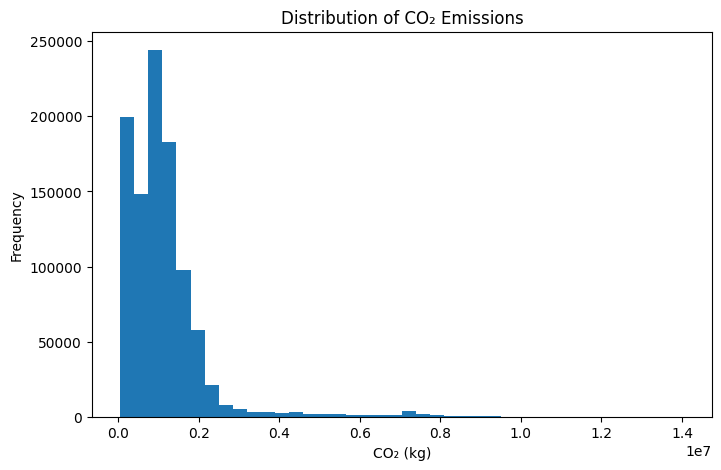

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(flights_full['co2_emissions'], bins=40)
plt.title('Distribution of CO₂ Emissions')
plt.xlabel('CO₂ (kg)')
plt.ylabel('Frequency')
plt.show()


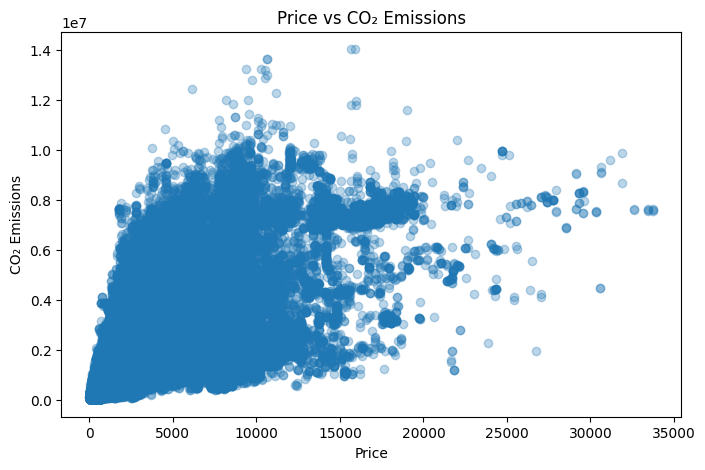

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(flights_full['price'], flights_full['co2_emissions'], alpha=0.3)
plt.title('Price vs CO₂ Emissions')
plt.xlabel('Price')
plt.ylabel('CO₂ Emissions')
plt.show()

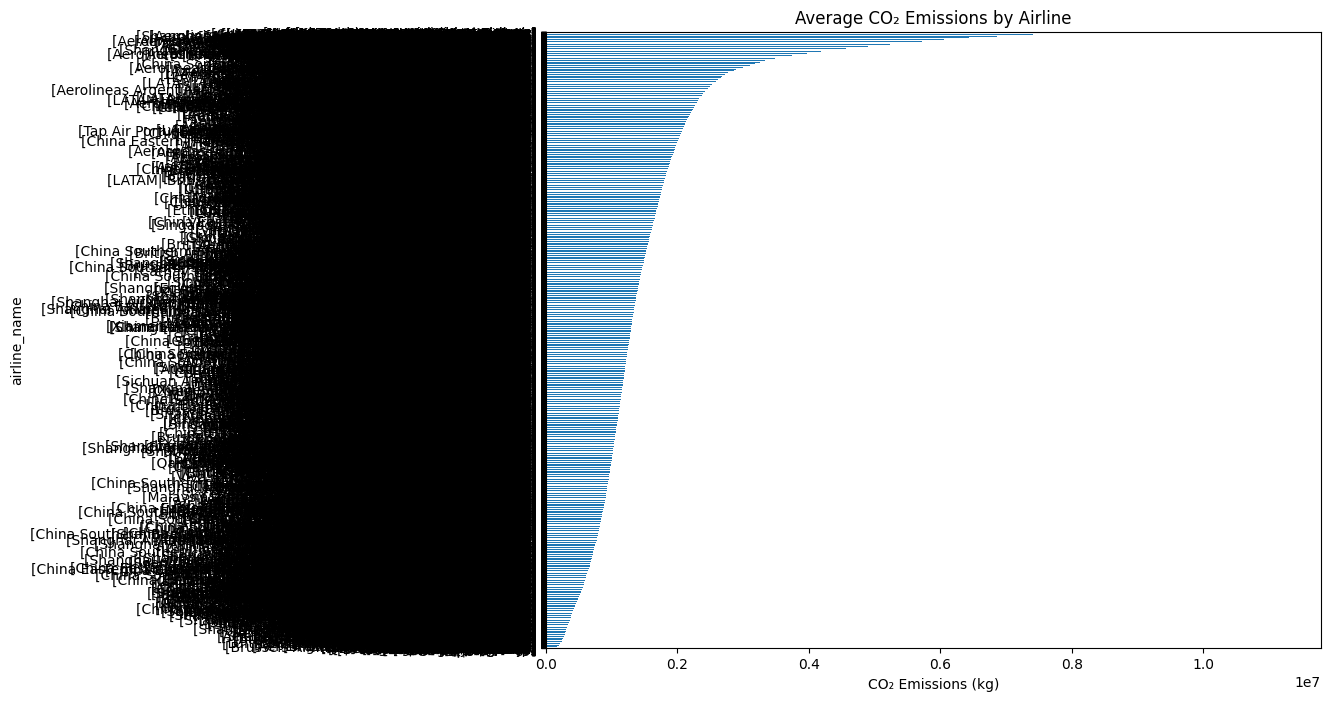

In [ ]:
co2_by_airline = flights_full.groupby('airline_name')['co2_emissions'].mean().sort_values()

plt.figure(figsize=(10,8))
co2_by_airline.plot(kind='barh')
plt.title('Average CO₂ Emissions by Airline')
plt.xlabel('CO₂ Emissions (kg)')
plt.show()

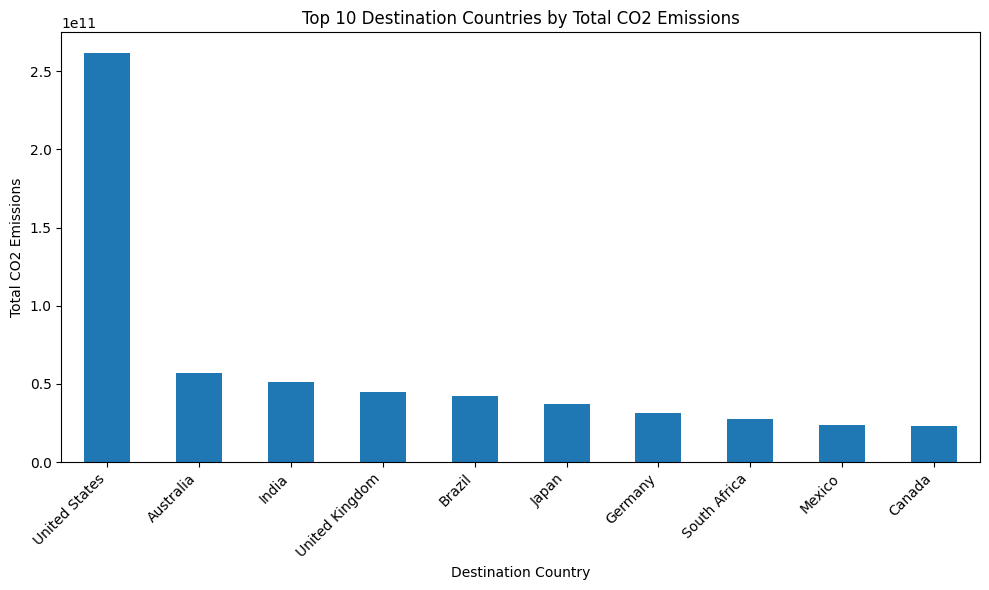

In [ ]:
co2_by_country = (
    flights_full.groupby('dest_country')['co2_emissions']
    .sum()
    .sort_values(ascending=False)
)

# Plot top 10
plt.figure(figsize=(10,6))
co2_by_country.head(10).plot(kind='bar')
plt.title("Top 10 Destination Countries by Total CO2 Emissions")
plt.xlabel("Destination Country")
plt.ylabel("Total CO2 Emissions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
co2_from = flights_full.groupby('from_country')['co2_emissions'].sum()

# ---- 2. CO₂ by destination country ----
co2_to = flights_full.groupby('dest_country')['co2_emissions'].sum()

# ---- 3. Combine both ----
co2_total = co2_from.add(co2_to, fill_value=0)

# ---- 4. Sort descending (largest emitters first) ----
co2_total_sorted = co2_total.sort_values(ascending=False)

# ---- 5. Show top 10 ----
co2_total_sorted.head(10)

,co2_emissions
United States,2.618396e+11
Australia,2.121326e+11
China,1.838121e+11
Brazil,1.596559e+11
India,1.221278e+11
Germany,1.145988e+11
Columbia,7.529080e+10
Canada,7.508405e+10
Chile,7.481943e+10
France,5.489338e+10


In [ ]:

plt.figure(figsize=(10,6))
co2_total_sorted.head(20).plot(kind='bar')
plt.title("Top 20 Countries by Total Flight CO₂ (Origin + Destination)")
plt.ylabel("Total CO₂ Emissions")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
pivot = flights_full.pivot_table(
    index='from_country',
    columns='dest_country',
    values='co2_emissions',
    aggfunc=['sum', 'mean', 'count'],
    fill_value=0
)

pivot


That is; going to move on to step 9, transformations / modeling layers. As recommended I will use SQL for this. I am going to use chatgpt to transfer my data to there as the only way I know how to do it is upload it as a CVS file from my documents, however that is can not exceed 100mb and mine does, so I have to find a different way which will be Google Cloud Storage

In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
!gsutil cp flights_full_joined.csv gs://sample_data/

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import storage

project_id = "lieve-airports-project"   # <-- your project
bucket_name = "lieve-airports-bucket"   # <-- your bucket
csv_path = "/content/flights_full_joined.csv"  # or whatever file you're uploading
destination_blob = "flights_full_joined.csv"

client = storage.Client(project=project_id)
bucket = client.bucket(bucket_name)
blob = bucket.blob(destination_blob)

blob.upload_from_filename(csv_path)

print("Uploaded to GCS!")
